In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.spatial import distance

sns.set()

In [7]:
df = pd.read_csv("data_covid.csv")

# Data Covid-19 Indonesia

In [8]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,39,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0,1.0


In [9]:
pd.options.display.min_rows = 20816

In [5]:
pd.options.display.max_rows = 20816

In [6]:
df.shape

(20816, 38)

In [7]:
print('Jumlah Data : {} Baris, {} Kolom'.format(df.shape[0], df.shape[1]))

Jumlah Data : 20816 Baris, 38 Kolom


In [8]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,39,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0,1.0


In [9]:
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                20816
Province                         614
Country                            0
Continent                          0
Island                           614
Time Zone                        614
Special Status                 17828
Total Regencies                    0
Total Cities                     588
Total Districts                    0
Total Urban Villages             590
Total Rural Villages             615
Area (km2)                         0
Population                         0
Population Density                 0
L

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20816 entries, 0 to 20815
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         20816 non-null  object 
 1   Location ISO Code            20816 non-null  object 
 2   Location                     20816 non-null  object 
 3   New Cases                    20816 non-null  int64  
 4   New Deaths                   20816 non-null  int64  
 5   New Recovered                20816 non-null  int64  
 6   New Active Cases             20816 non-null  int64  
 7   Total Cases                  20816 non-null  int64  
 8   Total Deaths                 20816 non-null  int64  
 9   Total Recovered              20816 non-null  int64  
 10  Total Active Cases           20816 non-null  int64  
 11  Location Level               20816 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# Cluster Total Case, Total Death, Total Recovered

In [11]:
df_pms= df[['Date','Location','Total Cases','Total Deaths','Total Recovered']].copy()
df_pms.head()

,Date,Location,Total Cases,Total Deaths,Total Recovered
0,3/1/2020,DKI Jakarta,39,20,39
1,3/2/2020,DKI Jakarta,41,20,39
2,3/2/2020,Indonesia,2,0,0
3,3/2/2020,Riau,2,0,0
4,3/3/2020,DKI Jakarta,43,20,39


In [12]:
df_pms = df_pms.rename(columns={'Date':'Tanggal','Location':'Lokasi','Total Cases':'Terkonfirmasi','Total Deaths':'Meninggal','Total Recovered':'Sembuh'})
df_pms.head()

,Tanggal,Lokasi,Terkonfirmasi,Meninggal,Sembuh
0,3/1/2020,DKI Jakarta,39,20,39
1,3/2/2020,DKI Jakarta,41,20,39
2,3/2/2020,Indonesia,2,0,0
3,3/2/2020,Riau,2,0,0
4,3/3/2020,DKI Jakarta,43,20,39


In [13]:
mod_pms = KMeans(n_clusters=3, init='random', n_init=2, random_state=1)
label_pms = mod_pms.fit_predict(df_pms[['Terkonfirmasi','Meninggal','Sembuh']].values)

df_pms['Cluster'] = label_pms

df_pms.head()

,Tanggal,Lokasi,Terkonfirmasi,Meninggal,Sembuh,Cluster
0,3/1/2020,DKI Jakarta,39,20,39,1
1,3/2/2020,DKI Jakarta,41,20,39,1
2,3/2/2020,Indonesia,2,0,0,1
3,3/2/2020,Riau,2,0,0,1
4,3/3/2020,DKI Jakarta,43,20,39,1


In [14]:
df_pms

Output hidden; open in https://colab.research.google.com to view.

In [15]:
print(f'Jumlah iterasi pada proses training K-Means : {mod_pms.n_iter_}')

Jumlah iterasi pada proses training K-Means : 18


In [16]:
cl_0_pms = df_pms[df_pms.Cluster == 0]
cl_1_pms = df_pms[df_pms.Cluster == 1]
cl_2_pms = df_pms[df_pms.Cluster == 2]

colors = ["#26b99d", "#ff3f3f", "#f3ea5f"]

cl_1_pms

Output hidden; open in https://colab.research.google.com to view.

Frekuensi data cluster0 = 115
Frekuensi data cluster1 = 20261
Frekuensi data cluster2 = 440


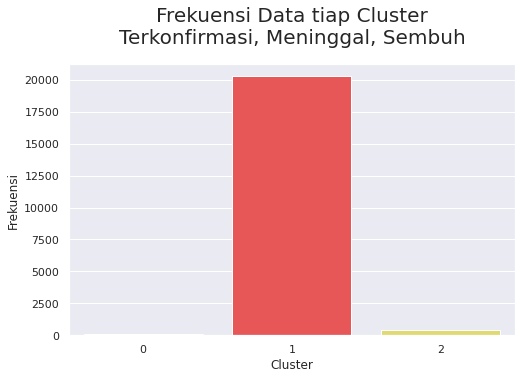

In [17]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_pms, palette=colors)
axes.set_title('Frekuensi Data tiap Cluster\nTerkonfirmasi, Meninggal, Sembuh', fontsize=20, pad=20)
axes.set_ylabel('Frekuensi')

print(f'Frekuensi data cluster0 = {cl_0_pms.Cluster.count()}')
print(f'Frekuensi data cluster1 = {cl_1_pms.Cluster.count()}')
print(f'Frekuensi data cluster2 = {cl_2_pms.Cluster.count()}')
plt.savefig('/content/gdrive/My Drive/tugas_akhir/frek_pms.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

plt.show()

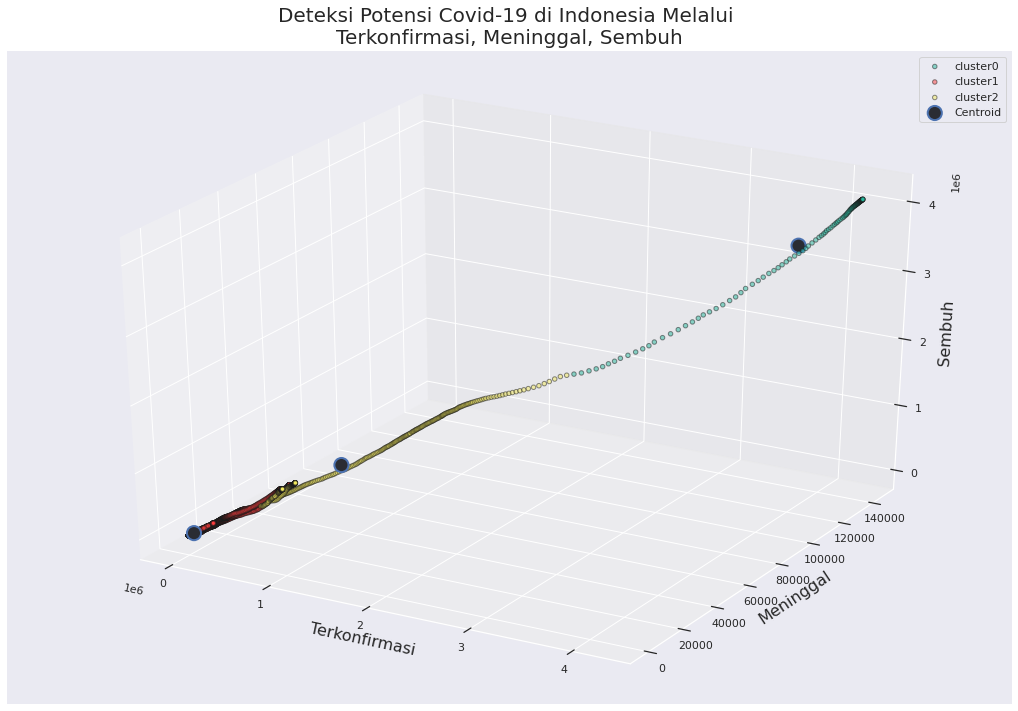

In [18]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter3D(cl_0_pms.Terkonfirmasi, cl_0_pms.Meninggal, cl_0_pms.Sembuh, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_1_pms.Terkonfirmasi, cl_1_pms.Meninggal, cl_1_pms.Sembuh, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_2_pms.Terkonfirmasi, cl_2_pms.Meninggal, cl_2_pms.Sembuh, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter3D(mod_pms.cluster_centers_[:,0], mod_pms.cluster_centers_[:,1], mod_pms.cluster_centers_[:, 2], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Deteksi Potensi Covid-19 di Indonesia Melalui \nTerkonfirmasi, Meninggal, Sembuh", pad=60, fontsize=20)
ax.set_xlabel("Terkonfirmasi", fontsize=16)
ax.set_ylabel("Meninggal", fontsize=16)
ax.set_zlabel("Sembuh", fontsize=16)
plt.savefig('/content/gdrive/My Drive/tugas_akhir/pola_pms.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

ax.legend()

plt.show()

In [19]:
mod_pms.cluster_centers_

array([[3.92484420e+06, 1.25268957e+05, 3.58453381e+06],
       [3.38816806e+04, 1.17362687e+03, 2.93511842e+04],
       [1.09880561e+06, 2.62140909e+04, 9.92694466e+05]])

In [20]:
c0_pms = mod_pms.cluster_centers_[0]
c1_pms = mod_pms.cluster_centers_[1]
c2_pms = mod_pms.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_pms, c1_pms)
dist_c0c2 = distance.euclidean(c0_pms, c2_pms)
dist_c1c2 = distance.euclidean(c1_pms, c2_pms)

print(f'Jarak Centroid (c0,c1): {dist_c0c1}\nJarak Centroid (c0,c2): {dist_c0c2}\nJarak Centroid (c1,c2): {dist_c1c2}')

Jarak Centroid (c0,c1): 5272031.152412145
Jarak Centroid (c0,c2): 3835875.015799394
Jarak Centroid (c1,c2): 1436217.35349534


Hasil Silhoutte Score 0.93587440944108



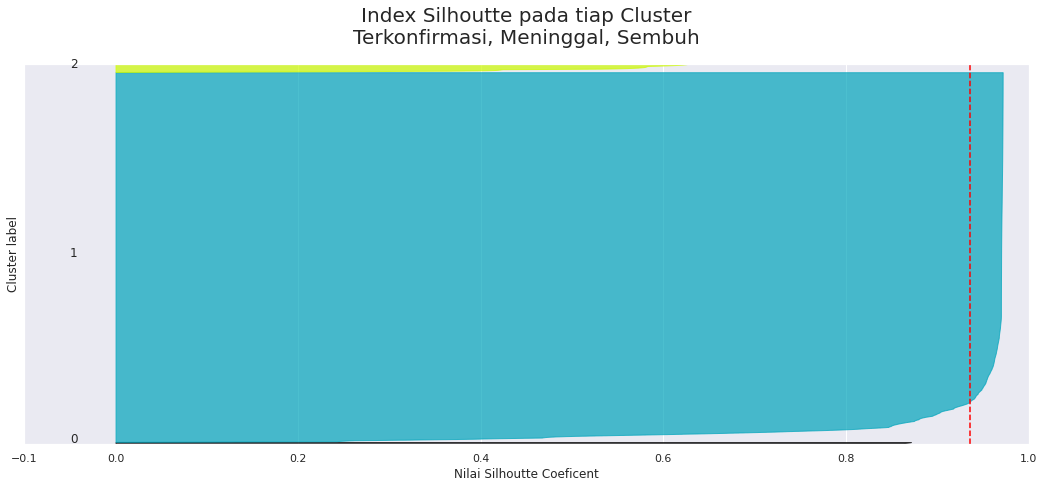

In [21]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_pms) + (3 + 1) * 10])

silavg_pms = silhouette_score(df_pms[['Terkonfirmasi','Meninggal','Sembuh']].values, label_pms)

print(f'Hasil Silhoutte Score {silavg_pms}')
print('')

sample_sil_pms = silhouette_samples(df_pms[['Terkonfirmasi','Meninggal','Sembuh']].values, label_pms)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_pms[label_pms == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Index Silhoutte pada tiap Cluster\nTerkonfirmasi, Meninggal, Sembuh", fontsize=20, pad=20)
axes.set_xlabel("Nilai Silhoutte Coeficent")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_pms, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('/content/gdrive/My Drive/tugas_akhir/silhouette_pms.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

plt.show()

In [22]:
max_pms_0, min_pms_0 = np.max(sample_sil_pms[label_pms==0]), np.min(sample_sil_pms[label_pms==0])
max_pms_1, min_pms_1 = np.max(sample_sil_pms[label_pms==1]), np.min(sample_sil_pms[label_pms==1])
max_pms_2, min_pms_2 = np.max(sample_sil_pms[label_pms==2]), np.min(sample_sil_pms[label_pms==2])

print(f'Range nilai silhoutte: {np.min(sample_sil_pms)}, {np.max(sample_sil_pms)}')
print("")
print(f'nilai silhoutte cluster 0 = {np.average(sample_sil_pms[label_pms==0])}')
print(f'nilai silhoutte cluster 1 = {np.average(sample_sil_pms[label_pms==1])}')
print(f'nilai silhoutte cluster 2 = {np.average(sample_sil_pms[label_pms==2])}')
print("")
print(f'Range nilai silhoutte pada cluster 0 = {min_pms_0}, {max_pms_0}')
print(f'Range nilai silhoutte pada cluster 1 = {min_pms_1}, {max_pms_1}')
print(f'Range nilai silhoutte pada cluster 2 = {min_pms_2}, {max_pms_2}')

Range nilai silhoutte: 0.0039034768510575303, 0.9716019744735641

nilai silhoutte cluster 0 = 0.7657529043048692
nilai silhoutte cluster 1 = 0.9466414639546211
nilai silhoutte cluster 2 = 0.4845395948770119

Range nilai silhoutte pada cluster 0 = 0.018447812855798294, 0.8710714967377012
Range nilai silhoutte pada cluster 1 = 0.013213808987994697, 0.9716019744735641
Range nilai silhoutte pada cluster 2 = 0.0039034768510575303, 0.6256580004184776


# Cluster Positif dan Meninggal


In [23]:
df_pm = df[['Date','Location','Total Cases','Total Deaths']].copy()
df_pm.head()

,Date,Location,Total Cases,Total Deaths
0,3/1/2020,DKI Jakarta,39,20
1,3/2/2020,DKI Jakarta,41,20
2,3/2/2020,Indonesia,2,0
3,3/2/2020,Riau,2,0
4,3/3/2020,DKI Jakarta,43,20


In [24]:
df_pm = df_pm.rename(columns={'Date':'Tanggal','Location':'Lokasi','Total Cases':'Terkonfirmasi','Total Deaths':'Meninggal'})
df_pm.head()

,Tanggal,Lokasi,Terkonfirmasi,Meninggal
0,3/1/2020,DKI Jakarta,39,20
1,3/2/2020,DKI Jakarta,41,20
2,3/2/2020,Indonesia,2,0
3,3/2/2020,Riau,2,0
4,3/3/2020,DKI Jakarta,43,20


In [25]:
mod_pm = KMeans(n_clusters=3, init='random', n_init=2, random_state=1)
label_pm = mod_pm.fit_predict(df_pm[['Terkonfirmasi','Meninggal']].values)

df_pm['Cluster'] = label_pm


df_pm.head()

,Tanggal,Lokasi,Terkonfirmasi,Meninggal,Cluster
0,3/1/2020,DKI Jakarta,39,20,1
1,3/2/2020,DKI Jakarta,41,20,1
2,3/2/2020,Indonesia,2,0,1
3,3/2/2020,Riau,2,0,1
4,3/3/2020,DKI Jakarta,43,20,1


In [26]:
print(f'Jumlah iterasi pada proses training K-Means : {mod_pm.n_iter_}')

Jumlah iterasi pada proses training K-Means : 17


In [27]:
cl_0_pm = df_pm[df_pm.Cluster == 0]
cl_1_pm = df_pm[df_pm.Cluster == 1]
cl_2_pm = df_pm[df_pm.Cluster == 2]

colors = ["#26b99d", "#ff3f3f", "#f3ea5f"]

cl_1_pm

Output hidden; open in https://colab.research.google.com to view.

Frekuensi data cluster0 = 119
Frekuensi data cluster1 = 20242
Frekuensi data cluster2 = 455


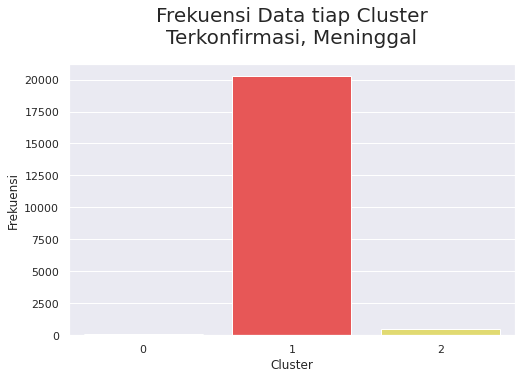

In [28]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_pm, palette=colors)
axes.set_title('Frekuensi Data tiap Cluster\nTerkonfirmasi, Meninggal', fontsize=20, pad=20)
axes.set_ylabel('Frekuensi')

print(f'Frekuensi data cluster0 = {cl_0_pm.Cluster.count()}')
print(f'Frekuensi data cluster1 = {cl_1_pm.Cluster.count()}')
print(f'Frekuensi data cluster2 = {cl_2_pm.Cluster.count()}')
plt.savefig('/content/gdrive/My Drive/tugas_akhir/frek_pm.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

plt.show()

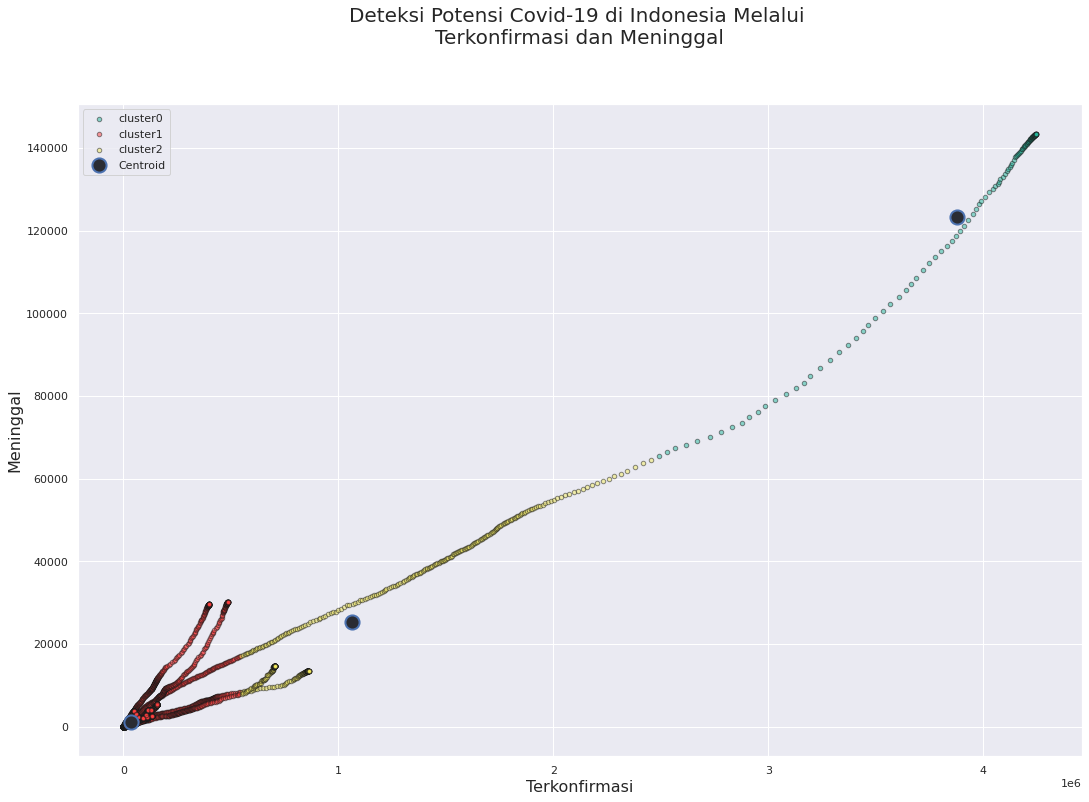

In [29]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()


ax.scatter(cl_0_pm.Terkonfirmasi, cl_0_pm.Meninggal, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_1_pm.Terkonfirmasi, cl_1_pm.Meninggal, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_2_pm.Terkonfirmasi, cl_2_pm.Meninggal, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter(mod_pm.cluster_centers_[:,0], mod_pm.cluster_centers_[:,1], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Deteksi Potensi Covid-19 di Indonesia Melalui \nTerkonfirmasi dan Meninggal", pad=60, fontsize=20)
ax.set_xlabel("Terkonfirmasi", fontsize=16)
ax.set_ylabel("Meninggal", fontsize=16)
plt.savefig('/content/gdrive/My Drive/tugas_akhir/pola_pm.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

ax.legend()

plt.show()


In [30]:
mod_pm.cluster_centers_

array([[3.87864245e+06, 1.23306092e+05],
       [3.33783211e+04, 1.16357588e+03],
       [1.06396892e+06, 2.52581451e+04]])

In [31]:
c0_pm = mod_pm.cluster_centers_[0]
c1_pm = mod_pm.cluster_centers_[1]
c2_pm = mod_pm.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_pm, c1_pm)
dist_c0c2 = distance.euclidean(c0_pm, c2_pm)
dist_c1c2 = distance.euclidean(c1_pm, c2_pm)

print(f'Jarak Centroid (c0,c1): {dist_c0c1}\nJarak Centroid (c0,c2): {dist_c0c2}\nJarak Centroid (c1,c2): {dist_c1c2}')

Jarak Centroid (c0,c1): 3847203.5272492864
Jarak Centroid (c0,c2): 2816380.7402845956
Jarak Centroid (c1,c2): 1030872.2149852032


Hasil Silhoutte Score 0.9342897740145775



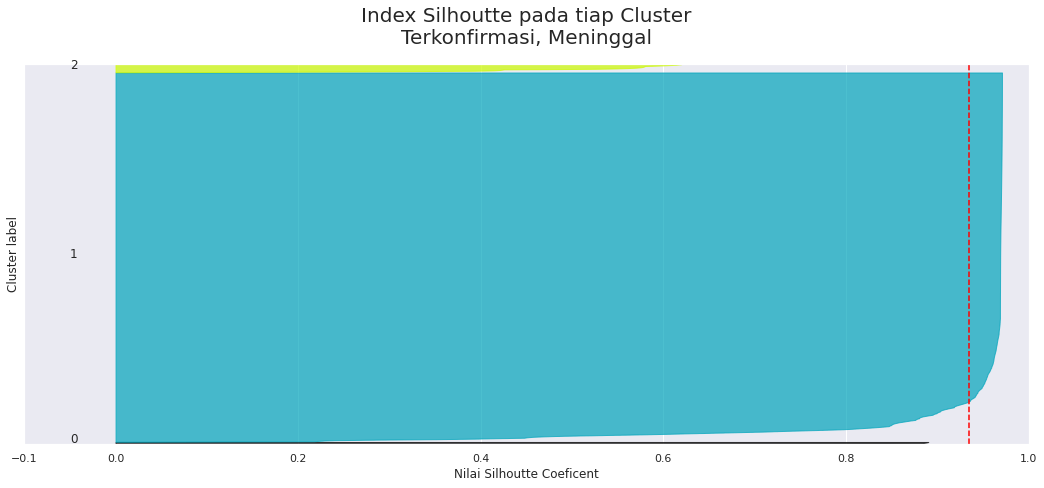

In [32]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_pm) + (3 + 1) * 10])

silavg_pm = silhouette_score(df_pm[['Terkonfirmasi','Meninggal']].values, label_pm)

print(f'Hasil Silhoutte Score {silavg_pm}')
print('')

sample_sil_pm = silhouette_samples(df_pm[['Terkonfirmasi','Meninggal']].values, label_pm)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_pm[label_pm == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Index Silhoutte pada tiap Cluster\nTerkonfirmasi, Meninggal", fontsize=20, pad=20)
axes.set_xlabel("Nilai Silhoutte Coeficent")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_pm, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('/content/gdrive/My Drive/tugas_akhir/silhouette_pm.png',
             dpi=300,
             bbox_inches ="tight",
             pad_inches = 1)

plt.show()

In [33]:
max_pm_0, min_pm_0 = np.max(sample_sil_pm[label_pm==0]), np.min(sample_sil_pm[label_pm==0])
max_pm_1, min_pm_1 = np.max(sample_sil_pm[label_pm==1]), np.min(sample_sil_pm[label_pm==1])
max_pm_2, min_pm_2 = np.max(sample_sil_pm[label_pm==2]), np.min(sample_sil_pm[label_pm==2])

print(f'Range nilai silhoutte: {np.min(sample_sil_pm)}, {np.max(sample_sil_pm)}')
print("")
print(f'nilai silhoutte cluster 0 = {np.average(sample_sil_pm[label_pm==0])}')
print(f'nilai silhoutte cluster 1 = {np.average(sample_sil_pm[label_pm==1])}')
print(f'nilai silhoutte cluster 2 = {np.average(sample_sil_pm[label_pm==2])}')
print("")
print(f'Range nilai silhoutte pada cluster 0 = {min_pm_0}, {max_pm_0}')
print(f'Range nilai silhoutte pada cluster 1 = {min_pm_1}, {max_pm_1}')
print(f'Range nilai silhoutte pada cluster 2 = {min_pm_2}, {max_pm_2}')

Range nilai silhoutte: 0.0010802947452171713, 0.9708215362875922

nilai silhoutte cluster 0 = 0.7945227298828484
nilai silhoutte cluster 1 = 0.9452316356556538
nilai silhoutte cluster 2 = 0.4840636529442688

Range nilai silhoutte pada cluster 0 = 0.018899675325332297, 0.8901085097421538
Range nilai silhoutte pada cluster 1 = 0.017918305983614588, 0.9708215362875922
Range nilai silhoutte pada cluster 2 = 0.0010802947452171713, 0.6199982660835874
